<a href="https://colab.research.google.com/github/YGuo00/MA-573-Independent-Study/blob/main/src/hw_3_17_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so    # library for minimization and maximization
import scipy.stats as ss   # library for statistical function

In [ ]:
np_option_data1 = np.loadtxt('20optiondata2.dat.txt', comments = '#', delimiter = ',')

print('otype, maturity, strike, option_price')
print(np_option_data1)

otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


In [ ]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [ ]:
class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [ ]:
def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [ ]:
def distance_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return sum(abs(option.market_price - gbm.bsm_price(option)))

import scipy.optimize as so

def calibrated_volatility(gbm, option):

In [ ]:
gbm1 = Gbm(
    init_state = 100., #market data
    drift_ratio = .05, #market data
    vol_ratio = .1 #initial guess
)

In [ ]:
num_row = np_option_data1.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data1[i,0],
      strike = np_option_data1[i,2],
      maturity = np_option_data1[i,1],
      market_price = np_option_data1[i,3]
  )   
  option_list.append(option1)

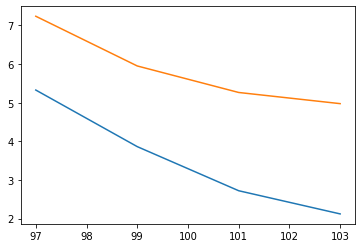

In [ ]:
np_option_data2 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
for i in range(num_row):
  np_option_data2[i,4] = calibrated_volatility(gbm1, option_list[i])
  
print('>>>>>>otype, maturity, strike, option_price, calibrated vol')
print(np_option_data2)